# Tugas Pembelajaran Mesin : Preprocessing Data dan Implementasi Regresi Logistik
__Link Dataset__: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
- Nama    : Farhan Nawwafal Pramudia
- NIM     : 10123470
- Kelas   : IF-4

## Menyiapkan Library yang Dibutuhkan

In [1]:
import pandas as pd
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Gathering Data

**Membaca file `weathers_classification_data.csv`**

In [2]:
df = pd.read_csv('./dataset/weather_classification_data.csv')

**Menampilkan data nya**

In [3]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


## Exploratory Data Analysis

### Melihat Struktur Data dari `dataframe (df)`

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Insight: struktur data dari dataframe, semuanya sudah benar. Tidak ada tipe data yang kurang tepat.

### Cek Descriptive Statistics

In [5]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


### Cek Missing Values

In [6]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

Insight: Dari data di atas, terlihat jelas bahwa pada data `weather_classification_data`, tidak ada kolom yang memiliki data yang kosong atau missing value

### Cek Duplikasi Data

In [7]:
print(f'Jumlah data duplikat: {df.duplicated().sum()} buah data')

Jumlah data duplikat: 0 buah data


Insight: Dari data di atas, terlihat jelas bahwa tidak ada data yang duplikat.

### Cek Outlier

**Cek outlier kolom `Temperature`**

<Axes: xlabel='Temperature'>

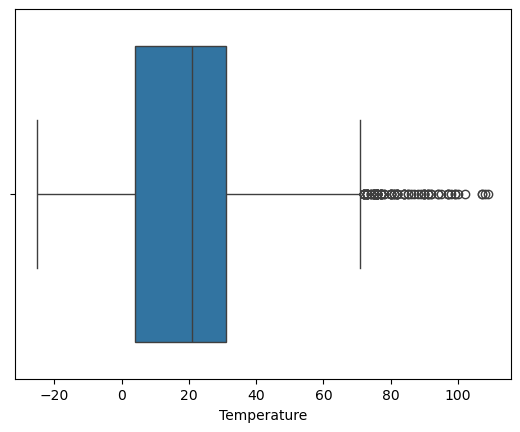

In [8]:
sns.boxplot(data=df, x=df['Temperature'])

In [9]:
df['Temperature'].skew()

0.2217414467117672

**Cek outlier kolom `Humidity`**

<Axes: xlabel='Humidity'>

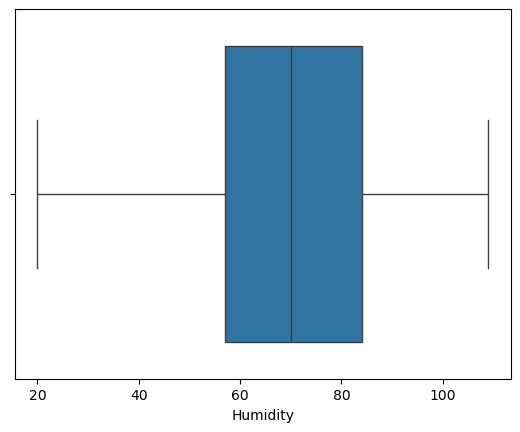

In [10]:
sns.boxplot(data=df, x=df['Humidity'])

In [11]:
df['Humidity'].skew()

-0.40161426558981855

**Cek outlier kolom `Wind Speed`**

<Axes: xlabel='Wind Speed'>

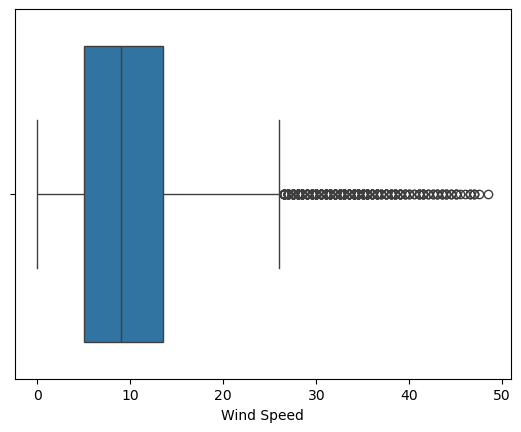

In [12]:
sns.boxplot(data=df, x=df['Wind Speed'])

In [13]:
df['Wind Speed'].skew()

1.3602625756285232

**Cek outlier kolom `precipitation`**

<Axes: xlabel='Precipitation (%)'>

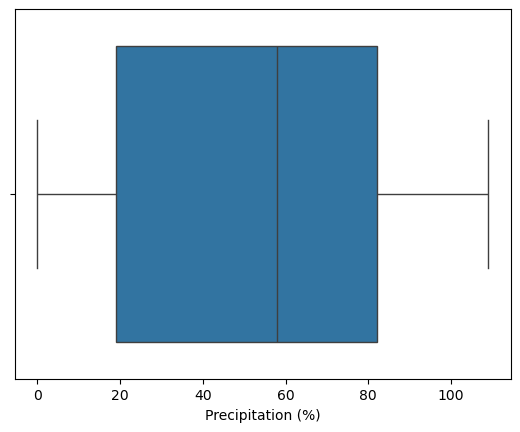

In [14]:
sns.boxplot(data=df, x=df['Precipitation (%)'])

In [15]:
df['Precipitation (%)'].skew()

-0.15245706717664612

**Cek outlier `Atmoshperic Pressure`**

<Axes: xlabel='Atmospheric Pressure'>

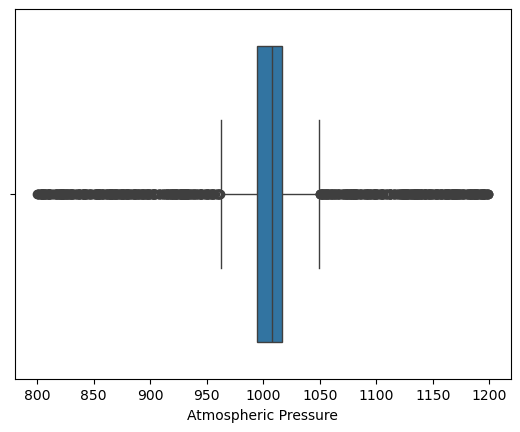

In [16]:
sns.boxplot(data=df, x=df['Atmospheric Pressure'])

In [17]:
df['Atmospheric Pressure'].skew()

-0.2938986063675234

**Cek outlier kolom `Visibility`**

<Axes: xlabel='Visibility (km)'>

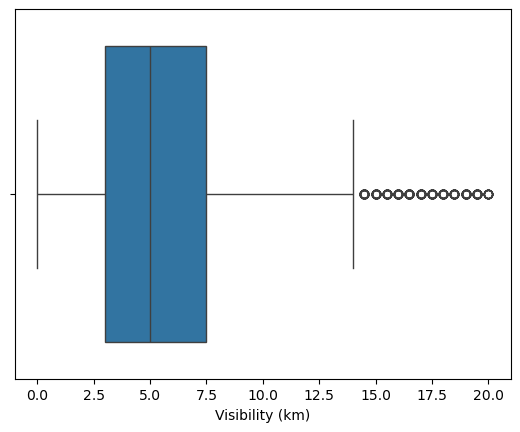

In [18]:
sns.boxplot(data=df, x=df['Visibility (km)'])

In [19]:
df['Visibility (km)'].skew()

1.2332751645049822

### Summary Hasil Cek Outlier

In [20]:
# Perbaiki nama kolom sesuai dataset
cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'Visibility (km)']

summary = {}
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    summary[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers)
    }

summary_df = pd.DataFrame(summary).T
summary_df

,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
Temperature,4.0,31.0000,27.0000,-36.50000,71.50000,92.0
Humidity,57.0,84.0000,27.0000,16.50000,124.50000,0.0
Wind Speed,5.0,13.5000,8.5000,-7.75000,26.25000,404.0
Precipitation (%),19.0,82.0000,63.0000,-75.50000,176.50000,0.0
Atmospheric Pressure,994.8,1016.7725,21.9725,961.84125,1049.73125,927.0
Visibility (km),3.0,7.5000,4.5000,-3.75000,14.25000,383.0


In [21]:
outlier_counts = summary_df['Outlier Count']
outlier_counts_df = pd.DataFrame(outlier_counts)
outlier_counts_df.columns = ['Outlier Count']
outlier_counts_df

,Outlier Count
Temperature,92.0
Humidity,0.0
Wind Speed,404.0
Precipitation (%),0.0
Atmospheric Pressure,927.0
Visibility (km),383.0


Insight:
- Untuk fitur `Temperature`, ia memiliki outlier sebanyak 92 data -> 
- Untuk `Humidity` dan `Precipitaion` tidak memiliki outlier
- Untuk fitur `Wind Speed` memiliki outlier sebanyak 404  data
- Untuk `Atmoshperic Pressure`, memiliki outlier sebanyak 927 data
- Untuk `Visibility (km)` memiliki outlier sebanyak 383 data

**Cek Nilai `Temperature` yang Berada di Bawah Lower Bound dan Upper Bound** 

In [22]:
# Ambil batas bawah & atas dari summary
lower_bound_temp = summary_df.loc['Temperature', 'Lower Bound']
upper_bound_temp = summary_df.loc['Temperature', 'Upper Bound']

In [23]:
df_outlier_temp = df[(df['Temperature'] <= lower_bound_temp) | (df['Temperature'] >= upper_bound_temp)]

In [24]:
# Cek nilai minimum dan maksimum dari data outlier suhu
print(f'Minimum nilai temperature dari data outlier: {df_outlier_temp["Temperature"].min()}')
print(f'Maksimum nilai temperature dari data outlier: {df_outlier_temp["Temperature"].max()}')

Minimum nilai temperature dari data outlier: 72.0
Maksimum nilai temperature dari data outlier: 109.0


Insight:
- Berdasarkan data di atas, sebanyak 92 baris data outlier yang kurang dari lower_bound dan lebih dari upper bound pada fitur `Temperature`

**Cek Nilai `Wind Speed` yang Berada di Bawah Lower Bound dan Upper Bound** 

In [25]:
# Ambil batas bawah & atas dari summarys
lower_bound_wind = summary_df.loc['Wind Speed', 'Lower Bound']
upper_bound_wind = summary_df.loc['Wind Speed', 'Upper Bound']

In [26]:
df_outlier_wind = df[(df['Wind Speed'] <= lower_bound_wind) | (df['Wind Speed'] >= upper_bound_wind)]

In [27]:
# Cek nilai minimum dan maksimum dari data outlier Wind Speed
print(f'Minimum nilai Wind Speed dari data outlier: {df_outlier_wind["Wind Speed"].min()}')
print(f'Maksimum nilai Wind Speed dari data outlier: {df_outlier_wind["Wind Speed"].max()}')

Minimum nilai Wind Speed dari data outlier: 26.5
Maksimum nilai Wind Speed dari data outlier: 48.5


Insight:
- Berdasarkan data di atas, sebanyak 404 baris data outlier yang kurang dari lower_bound dan lebih dari upper bound pada fitur `Wind Speed`

**Cek Nilai `Atmospheric Pressure` yang Berada di Bawah Lower Bound dan Upper Bound** 

In [28]:
# Ambil batas bawah & atas dari summarys
lower_bound_athpres = summary_df.loc['Atmospheric Pressure', 'Lower Bound']
upper_bound_athpres = summary_df.loc['Atmospheric Pressure', 'Upper Bound']

In [29]:
df_outlier_athpres = df[(df['Atmospheric Pressure'] <= lower_bound_athpres) | (df['Atmospheric Pressure'] >= upper_bound_athpres)]

In [30]:
# Cek nilai minimum dan maksimum dari data outlier Atmospheric Pressure
print(f'Minimum nilai Atmospheric Pressure dari data outlier: {df_outlier_athpres["Atmospheric Pressure"].min()}')
print(f'Maksimum nilai Atmospheric Pressure dari data outlier: {df_outlier_athpres["Atmospheric Pressure"].max()}')

Minimum nilai Atmospheric Pressure dari data outlier: 800.12
Maksimum nilai Atmospheric Pressure dari data outlier: 1199.21


**Cek Nilai `Visibility` yang Berada di Bawah Lower Bound dan Upper Bound** 

In [31]:
# Ambil batas bawah & atas dari summarys
lower_bound_visibility = summary_df.loc['Visibility (km)', 'Lower Bound']
upper_bound_visibility = summary_df.loc['Visibility (km)', 'Upper Bound']

In [32]:
df_outlier_visibility = df[(df['Visibility (km)'] <= lower_bound_visibility) | (df['Atmospheric Pressure'] >= upper_bound_visibility)]

In [33]:
# Cek nilai minimum dan maksimum dari data outlier Visibility
print(f'Minimum nilai Visibility dari data outlier: {df_outlier_visibility["Visibility (km)"].min()}')
print(f'Maksimum nilai Visibility dari data outlier: {df_outlier_visibility["Visibility (km)"].max()}')

Minimum nilai Visibility dari data outlier: 0.0
Maksimum nilai Visibility dari data outlier: 20.0


## Preprocessing Data

In [34]:
# Hapus data outlier temperature
df = df[(df['Temperature'] > lower_bound_temp) & (df['Temperature'] < upper_bound_temp)]
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


<Axes: xlabel='Temperature'>

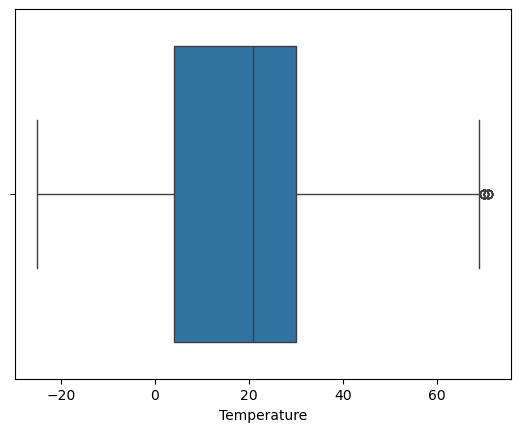

In [35]:
# Cek outlier temperature nya nya lagi
sns.boxplot(data=df, x=df['Temperature'])

Insight:
- Setelah dihapus atau difilter data `Temperature` nya, hasil boxplotnya pun sudah lebih baik dibandingkan sebelumnya

In [36]:
# Melakukan Winsorization (batasi outlier esktrim)
for col in ['Wind Speed', 'Visibility (km)']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df.loc[:, col] = df[col].clip(lower, upper)


<Axes: xlabel='Wind Speed'>

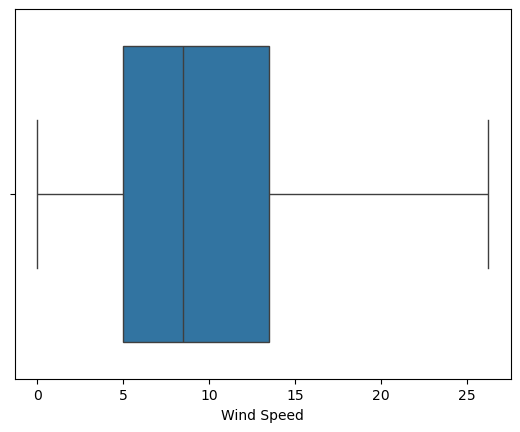

In [37]:
sns.boxplot(data=df, x=df['Wind Speed'])

Insight:
- Setelah di Winsorization, sudah terlihat bersih datanya, ga ada outlier

<Axes: xlabel='Visibility (km)'>

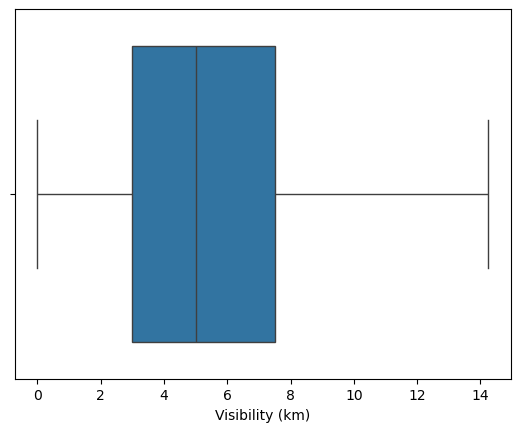

In [38]:
# Cek outlier Visibility lagi
sns.boxplot(data=df, x=df['Visibility (km)'])

In [39]:
# Melakukan One-Hot-Encoding untuk mengubah data kategorikal pada fitur Cloud Cover, Season, Location
categorical_cols = ['Cloud Cover', 'Season', 'Location']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

In [40]:
# Label Encoding untuk fitur Weather_Type
encoder = LabelEncoder()
df['Weather Type'] = encoder.fit_transform(df['Weather Type'])
encoder.classes_

array(['Cloudy', 'Rainy', 'Snowy', 'Sunny'], dtype=object)

In [41]:
df = df.astype(int)

## Standarisasi

In [42]:
# Definisikan kolom fitur (X) dan target (Y)
target_col = 'Weather Type'
X = df.drop(columns=[target_col])
y = df[target_col]

In [43]:
# Identifikasi fitur numerik untuk discale
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

In [44]:
# Identifikasi fitur non-numerik (dummy/binary) untuk digabungkan kembali
dummy_features = [col for col in X.columns if col not in numerical_features]

In [45]:
# Inisialisasi dan terapkan StandardScaler
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X[numerical_features])

In [46]:
# Konversi kembali ke DataFrame
X_scaled_df = pd.DataFrame(X_scaled_numerical, columns=numerical_features, index=X.index)

In [47]:
# Gabungkan fitur yang sudah di-scale dengan fitur dummy
X_final = pd.concat([X_scaled_df, X[dummy_features]], axis=1)
X_final

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,-0.282213,0.219793,-0.057217,0.897238,0.127133,-0.516381,-0.683861,0,0,0,1,0,0,0,1,0,1,0
1,1.224535,1.360271,-0.218403,0.552320,0.153938,0.785497,1.563091,0,0,0,1,0,1,0,0,0,1,0
2,0.682106,-0.226481,-0.379588,-1.172267,0.341575,0.264746,-0.041875,1,0,0,0,0,1,0,0,0,0,1
3,1.164265,0.715653,-1.346703,0.897238,0.556017,0.785497,-1.325848,1,0,0,0,0,1,0,0,1,0,0
4,0.501296,0.269379,1.232270,0.395540,-0.408972,-0.776757,-1.004855,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,-0.523293,0.269379,0.748712,0.552320,-0.060504,-0.776757,-1.325848,0,0,1,0,0,0,1,0,0,0,1
13196,-1.186262,0.368551,-1.024331,-0.952774,1.655033,-0.776757,0.279118,0,1,0,0,0,0,0,1,1,0,0
13197,0.682106,0.418137,-0.701960,-0.795993,0.180743,-0.256006,1.242098,0,0,1,0,1,0,0,0,1,0,0
13198,-0.945182,0.368551,0.103969,1.273511,-0.569804,-1.037132,-1.004855,0,0,1,0,0,0,0,1,0,1,0


In [48]:
# Mengambil data untuk dipindahkan ke excel
# y_final = y.reset_index(drop=True)
# X_final_reset = X_final.reset_index(drop=True)
# df_exported = pd.concat([X_final_reset, y_final], axis=1)
# df_exported.to_excel('final-data-weather-type.xlsx', index=False)

## Hasil Akhir

In [49]:
# Menampilkan 5 data teratas
X_final.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,-0.282213,0.219793,-0.057217,0.897238,0.127133,-0.516381,-0.683861,0,0,0,1,0,0,0,1,0,1,0
1,1.224535,1.360271,-0.218403,0.552320,0.153938,0.785497,1.563091,0,0,0,1,0,1,0,0,0,1,0
2,0.682106,-0.226481,-0.379588,-1.172267,0.341575,0.264746,-0.041875,1,0,0,0,0,1,0,0,0,0,1
3,1.164265,0.715653,-1.346703,0.897238,0.556017,0.785497,-1.325848,1,0,0,0,0,1,0,0,1,0,0
4,0.501296,0.269379,1.232270,0.395540,-0.408972,-0.776757,-1.004855,0,0,1,0,0,0,0,1,0,0,1


In [50]:
# Menampilkan 5 data terbawah
X_final.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
13195,-0.523293,0.269379,0.748712,0.552320,-0.060504,-0.776757,-1.325848,0,0,1,0,0,0,1,0,0,0,1
13196,-1.186262,0.368551,-1.024331,-0.952774,1.655033,-0.776757,0.279118,0,1,0,0,0,0,0,1,1,0,0
13197,0.682106,0.418137,-0.701960,-0.795993,0.180743,-0.256006,1.242098,0,0,1,0,1,0,0,0,1,0,0
13198,-0.945182,0.368551,0.103969,1.273511,-0.569804,-1.037132,-1.004855,0,0,1,0,0,0,0,1,0,1,0
13199,-1.427341,-1.515717,-1.507889,1.210799,0.261159,0.264746,1.563091,0,0,1,0,1,0,0,0,0,0,1


## Implementasi Logistik Regresi

In [51]:
# Pembagian data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

In [52]:
print(f"Data Latih (X_train): {X_train.shape[0]} baris")
print(f"Data Uji (X_test): {X_test.shape[0]} baris")

Data Latih (X_train): 10486 baris
Data Uji (X_test): 2622 baris


In [53]:
# Melatih model regresi logistik
model_lr = LogisticRegression(
    C=1.0,
    solver='liblinear',
    random_state=42,
    max_iter=1000
)

In [54]:
# Melatih model
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [55]:
# Prediksi dan Evaluasi
y_pred = model_lr.predict(X_test)

In [56]:
# Tampilkan 5 data uji pertama, prediksi kelas, dan nilai aktualnya
hasil_prediksi = pd.DataFrame({
    'Actual_Weather_Type': y_test,
    'Predicted_Weather_Type': y_pred
})

In [57]:
# Gabungkan dengan data X_test untuk melihat fitur aslinya (ambil 5 baris pertama)
hasil_tabel = pd.concat([X_test.head(5).reset_index(drop=True), hasil_prediksi.head(5).reset_index(drop=True)], axis=1)

In [58]:
hasil_tabel

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Actual_Weather_Type,Predicted_Weather_Type
0,0.380756,0.219793,0.265155,-0.262939,0.368380,0.004370,0.279118,0,0,1,0,0,0,1,0,1,0,0,0,0
1,-1.186262,0.467723,-0.379588,1.022662,-0.542999,0.264746,-1.325848,0,0,1,0,0,0,0,1,0,1,0,2,2
2,0.199946,-1.565303,-0.863146,-1.329047,0.529212,1.306248,0.600111,0,0,0,1,0,0,1,0,0,1,0,3,3
3,-0.161673,0.071035,0.909898,0.176047,-0.248141,-1.037132,-0.362868,0,0,1,0,0,1,0,0,1,0,0,1,1
4,0.320486,-0.871099,0.103969,-0.513788,0.100328,0.004370,0.921104,0,0,0,1,1,0,0,0,1,0,0,0,0


In [59]:
# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy*100:.2f}%")

Akurasi model: 85.47%


In [60]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[538  81  23  17]
 [ 48 558  44   7]
 [ 30  11 604  15]
 [ 66  19  20 541]]


In [61]:
# Classification report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       659
           1       0.83      0.85      0.84       657
           2       0.87      0.92      0.89       660
           3       0.93      0.84      0.88       646

    accuracy                           0.85      2622
   macro avg       0.86      0.85      0.86      2622
weighted avg       0.86      0.85      0.86      2622

